# Chapter 14: Machine Learning and AI

## Introduction
Machine learning is a subfield of artificial intelligence (AI) that involves the development of algorithms and models that can learn from and make predictions or decisions based on data. There are many different types of machine learning algorithms, each with their own strengths and weaknesses, and they can be applied to a wide variety of problems.

## Types of machine learning models
### Decision trees
One of the most popular and widely used types of machine learning algorithms is decision trees. Decision trees are a type of algorithm that can be used for both classification and regression problems. They work by recursively partitioning the data into subsets based on the values of the input features, and making predictions based on the majority class or mean value of the observations in each subset.

<div style="display:flex; justify-content:center;">
    <img src="../images/trees.jpg" alt="Image" width="400" height="300" style="margin-left: 10px;">
</div>

Accuracy: 1.0


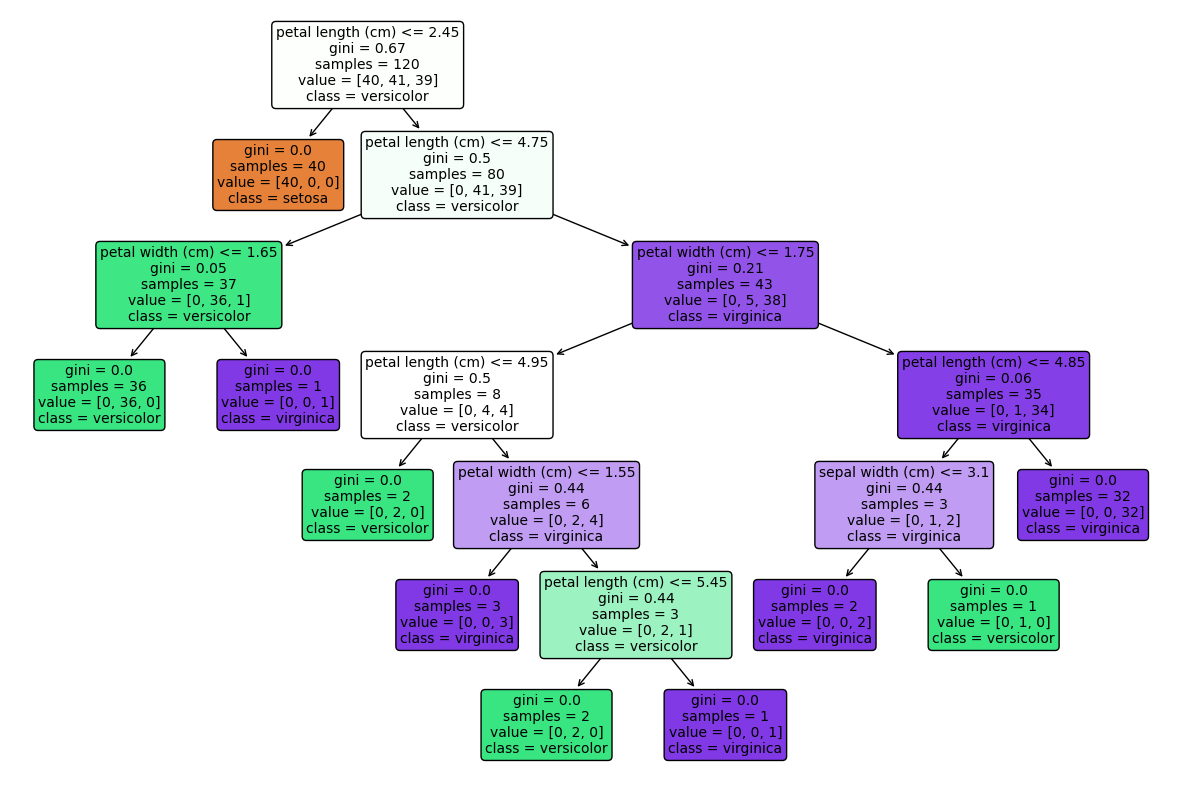

In [8]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build decision tree
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))

# Plot the decision tree with enhanced visualization
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names,
          filled=True, rounded=True, fontsize=10, precision=2, impurity=True)
plt.show()


In this example, we are using the **iris dataset**, that contains measurements of sepals and petals of three different species of irises. We are using all the columns as predictors and the species as response. 

The `train_test_split()` function is used to split the data into a training set and a test set, the `DecisionTreeClassifier()` function is used to build the decision tree model and the fit function is used to train the model. The predict function is used to make predictions on the test set, and the `accuracy_score()` function is used to evaluate the model’s performance by comparing the predicted values to the actual values.

We also plot the tree using `plot_tree()` to visualize the tree. We can see that petal length less than or equal to 2.45 cm is confidently identified as *Iris setosa*. We can also see that *Iris versicolor* and *Iris virginica* identification takes more steps. This is likely because the physical features of these two species are more similar than to those of *I. setosa*.

We can explore this further by using Principal Component Analysis (PCA), which is a form of summary statistic, not machine learning. It does this by finding a new set of uncorrelated variables, called **principal components**, which can be used to represent the original data.

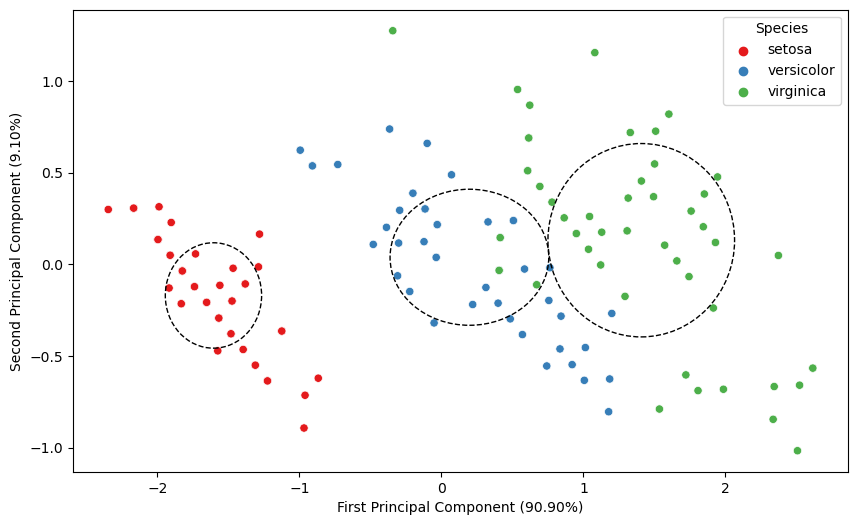

In [9]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Ellipse

# Import data
url = "https://raw.githubusercontent.com/lundquist-ecology-lab/biostatistics/main/example_data/iris.csv"
data = pd.read_csv(url)

# Scale data using the same method as in R
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, [0, 3]])

# Perform PCA with svd_solver='auto'
pca = PCA(n_components=2, svd_solver='auto')
pca.fit(data_scaled)
data_pca = pca.transform(data_scaled)

# Plot PCA with ellipses around groups
plt.figure(figsize=(10, 6))

# Create a scatter plot
scatter = sns.scatterplot(x=data_pca[:, 0], y=data_pca[:, 1], hue=data['Species'], palette='Set1')

# Add ellipses around groups
for spec in data['Species'].unique():
    ell_data = data_pca[data['Species'] == spec]
    ellipse = Ellipse(
        (ell_data[:, 0].mean(), ell_data[:, 1].mean()),
        width=2 * ell_data[:, 0].std(),
        height=2 * ell_data[:, 1].std(),
        fill=False,
        color='black',
        linestyle='dashed'
    )
    scatter.add_patch(ellipse)

# Add percentage of variance explained on axes
explained_var = pca.explained_variance_ratio_
plt.xlabel(f"First Principal Component ({explained_var[0] * 100:.2f}%)")
plt.ylabel(f"Second Principal Component ({explained_var[1] * 100:.2f}%)")

# Add legend
plt.legend(title='Species')

# Show the plot
plt.show()


You can see that the first principal component (PC1) explains 90.9% of the variance in the data. The next principal component (PC2) explains an additional 9.1%. The ellipses represent potential groupings of data based on the principal components. In the example above, we can see that the *Iris* species form three relatively clear clusters (particularly *I. setosa*). It makes sense that it would be more complicated to for the machine learning model to decern between *I. versicolor* and *I. virginica* based on our data.

### Linear models
Another popular type of machine learning algorithm is linear regression. Linear regression is a type of algorithm that can be used for continuous target variables and it attempts to find the best linear relationship between the input features and the target variable.

In [12]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load data
url = 'https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/898a40b035f7c951579041aecbfb2149331fa9f6/mtcars.csv'
data = pd.read_csv(url, index_col=0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['wt','hp']], data['mpg'], test_size=0.2, random_state=42)

# Build linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

8.474832262021078


In this example, we are using the **mtcars** dataset, a dataset that contains measurements of different cars such as the miles per gallon, weight, and horsepower. We are using the weight and horsepower as predictors and the miles per gallon as the target variable.

The predictors are the weight and horsepower and the target variable is the miles per gallon. The `train_test_split()` function is used to split the data into a training set and a test set, the `LinearRegression()` function is used to build the linear regression model, and the fit function is used to train the model. The predict function is used to make predictions on the test set, and the `mean_squared_error()` function is used to evaluate the model’s performance by comparing the predicted values to the actual values. The lower the mean squared error (MSE), the better. 

Below, we take the same model and only use horsepower as the predictor. Notice that the MSE is much higher, indicating that this model is less predictive than the previous one taking into account both weight and horsepower.

In [13]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load data
url = 'https://gist.githubusercontent.com/ZeccaLehn/4e06d2575eb9589dbe8c365d61cb056c/raw/898a40b035f7c951579041aecbfb2149331fa9f6/mtcars.csv'
data = pd.read_csv(url, index_col=0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['hp']], data['mpg'], test_size=0.2, random_state=42)

# Build linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, y_pred))

24.006401948028003


### Artificial neural networks (ANNs)
Finally, another popular type of machine learning algorithm is artificial neural networks (ANNs). Artificial neural networks are a type of algorithm that are inspired by the structure and function of the human brain. They are composed of layers of interconnected “neurons” that process and transmit information. They are highly flexible and can be used for a wide variety of problems, including image and speech recognition, natural language processing, and more.

<div style="display:flex; justify-content:center;">
    <img src="../images/network.jpg" alt="Image" width="400" height="300" style="margin-left: 10px;">
</div>

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load data
iris = load_iris()
X = iris.data
y = iris.target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build ANN model
clf = MLPClassifier(hidden_layer_sizes=(10,),max_iter=1000)
clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

1.0


/home/mlundquist/.local/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


This example again uses the iris dataset. We are using all the columns as predictors and the species as response. The `train_test_split()` function is used to split the data into a training set and a test set, the `MLPClassifier()` function is used to build the ANN model, the fit function is used to train the model, the predict function is used to make predictions on the test set, and the `accuracy_score()` function is used to evaluate the model’s performance by comparing the predicted values to the actual values.


## Generative AI (as written by ChatGPT)

ChatGPT (a generative AI) is a state-of-the-art language model developed by OpenAI. It is based on the transformer architecture, which has been shown to be highly effective for a variety of natural language processing tasks. The model is trained on a massive dataset of text from the internet, allowing it to generate human-like responses to a wide range of prompts.

<div style="display:flex; justify-content:center;">
    <img src="../images/gpt.png" alt="Image" width="300" height="300" style="margin-left: 10px;">
</div>

#### ChatGPT for biostatistics students
ChatGPT can potentially be used by biostatistics students to check their R or Python code for their homework, as it can generate explanations of the results and outputs of the code. However, it’s important to note that ChatGPT is not a replacement for human understanding and expertise, and students should still strive to understand the concepts and methods behind the code they are writing. Additionally, the model’s understanding of the code and the results is limited by the complexity of the underlying models and the quality of the input data.

It’s also important to note that using a model like ChatGPT to check homework could be considered as plagiarism in some cases, as it could be considered as the work of another person, so it’s important to check with your instructor regarding the use of such tools before using it.

It’s also possible to use ChatGPT to generate some examples, but students should be aware that the model is not aware of the context of the homework and it could generate examples that are not appropriate for the homework.

In short, ChatGPT can be a useful tool for biostatistics students to check their code, but it should be used with caution and with the understanding that it is not a replacement for human expertise and understanding.

#### ChatGPT in professional biostatistics
One potential application of ChatGPT in biostatistics is in the automated generation of research reports and manuscripts. For example, a researcher could provide the model with a dataset and a set of analysis commands in R or Python, and the model could generate a report detailing the results of the analysis. This could save researchers a significant amount of time and effort, as they would not need to manually write up the results of their analyses.

However, it’s important to note that ChatGPT is not a replacement for human expertise and understanding. The model is only as good as the data it was trained on, and it may make mistakes or miss important details if the input data is noisy or incomplete. Additionally, the model’s ability to understand and interpret the results of statistical analyses is limited by the complexity of the underlying models and the quality of the input data.

An example of how ChatGPT can be used in Python to generate a report on a logistic regression analysis:

In [16]:
%%script false --no-raise-error
# Load data
import pandas as pd
data = pd.read_csv("data.csv")

# Run logistic regression analysis
from sklearn.linear_model import LogisticRegression
X = data[['age', 'income']]
y = data['default']
clf = LogisticRegression(random_state=0).fit(X, y)

# Provide ChatGPT with the summary of the model
summary_model = clf.coef_

# ChatGPT generates a report
ChatGPT_output = "The logistic regression model shows that the age and income variables are both statistically significant in predicting default. The coefficient for age is -0.03, indicating that as age increases by one unit, the odds of default decrease by a factor of exp(-0.03). The coefficient for income is 0.05, indicating that as income increases by one unit, the odds of default increase by a factor of exp(0.05)."

**NOTE**: The data used in the Python example is a made up data set and is not based on any real-world dataset. It’s just an example to illustrate how ChatGPT can be used to generate a report on a logistic regression analysis. In a real-world scenario, the researcher would need to provide the model with a dataset in a format that can be read by the programming language being used. For example, a .csv file for Python.


## Conclusion
Machine learning is a powerful tool that can be used to extract insights from data and make predictions and decisions. There are many different types of machine learning algorithms, each with their own strengths and weaknesses, including decision trees, linear regression, and artificial neural networks. These examples demonstrate how to implement these algorithms, but it’s important to note that the performance of these models may vary depending on the specific problem and the quality of the data. It’s also important to understand the underlying concepts of each algorithm and the assumptions they make, to make the right choice for a given problem. In other words, there is no single best test, it is up to the biostatistician to decide on the best technique to solve their particular problem.